In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.style.use('fivethirtyeight') # Setting a style for all my plots 

# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [4]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

# < Solution Code >

path = 'Movie+Assignment+Data.csv' # defining the file-path
movies = pd.read_csv(path) # reading the data using read_csv method 

movies.head() # printing the initial 5 rows of the dataframe movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [5]:
# Check the number of rows and columns in the dataframe

# < Solution Code >

movies.shape

(100, 62)

In [6]:
# Check the column-wise info of the dataframe

# < Solution Code >

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [7]:
# Check the summary for the numeric columns 

# < Solution Code >

movies['title_year'] = movies['title_year'].astype('str') # year is not numerical values hence conversing it to a string value

movies.describe() # displaying the summary of numeric columns

,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,CVotes09,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,92404.170000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,75666.918775,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,7321.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,47098.250000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,71376.000000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,115240.250000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,485218.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [8]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

# < Solution Code >

movies['budget'] = movies['budget']/1000000
movies['Gross'] = movies['Gross']/1000000

-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [9]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

# < Solution Code >

movies['profit'] = movies['Gross'] - movies['budget']

In [10]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

# < Solution Code >

movies.sort_values(by = 'profit', ascending = False, inplace = True) # sorting the movies dataframe by profit dscending inplace

In [11]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

# < Solution Code >

top10 = movies.iloc[:10,:]
top10

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367


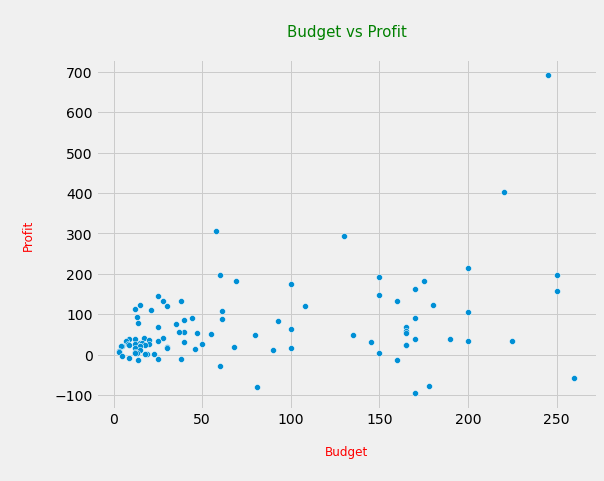

In [12]:
#Plot profit vs budget

# < Solution Code >

x = movies['budget'] 
y = movies['profit']

plt.figure(figsize = [8,6]) # optimizing the plot size

sns.scatterplot(x,y) # plotting a scatterplot to uncover the relation between the numerical values columns

plt.title('\nBudget vs Profit\n', color = 'green', fontsize = 15)
plt.xlabel('\nBudget\n', color = 'red',fontsize = 12)
plt.ylabel('\nProfit\n', color = 'red',fontsize = 12) 

plt.show() 

# Inferences
# There are raltives less numbers of movies in with high budget and there is no strong pattern can be scene as the budget increases
# Some of the high-budgets movies are also makinng losses.
# Majority of the movies budget are within 50 million dollars mark

The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [13]:
#Find the movies with negative profit

# < Solution Code >

neg_profit = movies[movies['profit'] < 0] # filtering out the list of movies with negative profit
neg_profit

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to or greater than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [14]:
# Change the scale of MetaCritic

# < Solution Code >

movies['MetaCritic'] = movies['MetaCritic']/10

In [15]:
# Find the average ratings

# < Solution Code >

movies['Avg_rating']  = movies[['MetaCritic','IMDb_rating']].mean(axis = 'columns')

In [16]:
#Sort in descending order of average rating

# < Solution Code >

movies.sort_values(by = 'Avg_rating', ascending = False, inplace = True)

In [17]:
# Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)

# < Solution Code >

mask = (abs(movies['MetaCritic']-movies['IMDb_rating']) < 0.5) & (movies['Avg_rating'] >= 8) # defining the filtering conditions

# applying the filtering conditions to the dataframe using the mask variable
# sorting the dataframe in descending order of avg_rating

UniversalAcclaim = movies[mask].sort_values(by = 'Avg_rating', ascending = False) 
UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
93,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.20
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00
33,The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,...,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.00


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [18]:
# Write your code here

# < Solution Code >

actors_likes_cols = ['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'] # list of actors fb-like columns
actors_names_cols = ['actor_1_name','actor_2_name','actor_3_name'] # list of actors-name columns

movies['actor_trio_likes'] = movies[actors_likes_cols].sum( axis = 'columns') # creating a new column -> sum of actor's facebook-likes

trio_likes_sorted = movies.sort_values(by = ['actor_trio_likes'],ascending = False) # sorting the dataframe in descending order of total fb likes
top5actors_df = trio_likes_sorted.iloc[:5,] # selcting the top 5 rows from the sorted dataframe

top5actors_df[actors_names_cols].values.tolist() # selecting the top 5 actor-trio and printing as a list

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above? Write your answers in the markdown cell provided below.

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`** 21Trios

- **`Most popular trio after applying the condition:`** Leonardo DiCaprio, Tom Hardy, Joseph Gordon-Levitt

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [19]:
# Your answer here (optional and not graded)

# < Solution Code >

actors_likes_cols = ['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'] # list of actors fb like columns
actors_names_cols = ['actor_1_name','actor_2_name', 'actor_3_name'] # list of actors name columns

# creating a new column in the data frame - > is_all_actor_popular, (as shown below)
# the condition is applied by using a lambda function and apply method to the each of the record in the dataframe contains only fb-likes columms
# the condition is checking that the minimum value amoung the fb-like columns is greater than the half of the maximum in the three columsns
# if this condition passes, then no need to check with second max value with with either of the other two values, it is already taken care
# the function will return a boolean series and that gets written to new column named -> is_all_actor_popular which can be used to slice the movie dataframe.
    
movies['Is_all_actor_popular'] = movies[actors_likes_cols].apply(lambda x : min(x) >= max(x)/2, axis = 1)

# sorted all popular actord dataframe in the descending order of all facebook likes (as shown below)

all_actor_popular_df = movies[movies['Is_all_actor_popular']].sort_values(by = 'actor_trio_likes', ascending = False) 

print('\nNo trios satisfies the condition :', len(all_actor_popular_df),'\n') # printing the number of trios satisfies the condition

all_actor_popular_df.iloc[:5,:][actors_names_cols].values.tolist() # printing the top5 actors trios with all_popular actor conditon


No trios satisfies the condition : 21 



[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt'],
 ['Chris Hemsworth', 'Robert Downey Jr.', 'Scarlett Johansson'],
 ['Robert Downey Jr.', 'Scarlett Johansson', 'Chris Evans']]

- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

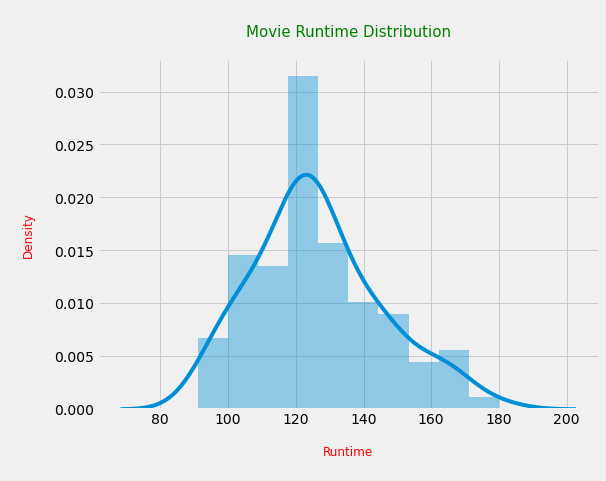

In [20]:
# Runtime histogram/density plot

# < Solution Code >

x = movies['Runtime'] 

plt.figure(figsize=[8,6]) # optimizing the plot size

sns.distplot(x) # plotting the distplot to uncover distribution of the Runtime 

plt.title('\nMovie Runtime Distribution\n', color = 'green', fontsize = 15)
plt.xlabel('\nRuntime\n', color = 'red',fontsize = 12)
plt.ylabel('\nDensity\n', color = 'red',fontsize = 12) 

plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [21]:
# Write your code here

# < Solution Code >

mask = movies['content_rating'] == 'R' # defining the masking condition for the given question
movies_R = movies[mask]  # creating the Dataframe of R-rated movies applying the above condition

movies_R.sort_values(by = ['CVotesU18'], ascending = False, inplace = True) #sorting the R-rated movies dataframe, descending by 'CVotesU18'
PopularR = movies_R.iloc[:10,] # Selcting the first 10 rows of sorted dataframe using the index-loc.

PopularR

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,actor_trio_likes,Is_all_actor_popular
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25,17166.0,False
36,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.5,7.8,8.1,8.1,R,USA,16.866727,7.85,44000.0,False
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25,40265.0,False
29,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.2,8.0,8.2,8.0,R,Australia,3.629485,8.55,36943.0,False
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65,25505.0,False
31,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.6,8.1,7.9,R,USA,48.635922,7.80,56733.0,False
40,Shutter Island,2010,80.0,127.968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,7.6,7.6,7.8,8.1,R,USA,47.968405,7.20,29386.0,False
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00,2272.0,True
65,The Grand Budapest Hotel,2014,25.0,59.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,7.9,7.7,8.1,8.0,R,USA,34.073773,8.45,14670.0,False
72,Birdman or (The Unexpected Virtue of Ignorance),2014,18.0,42.335698,Emma Stone,Naomi Watts,Merritt Wever,15000,6000.0,529.0,...,7.0,7.1,7.9,7.7,R,USA,24.335698,8.30,21529.0,False


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [22]:
# Create the dataframe df_by_genre

# < Solution Code >

cols = movies.columns # list of all the columns available in the dataframe

votes_cols = [x for x in cols if 'votes' in x.lower()] # creating a list of all the colums related to votes, includes votes & cvotes
genre_cols = [x for x in cols if 'genre' in x.lower()] # creating a list of all the colums related to genre

select_cols = genre_cols + votes_cols # combining the above two list to one

df_by_genre = movies[select_cols] # creating dataframe with the selected list of columns
df_by_genre.head() # printing the head of the dataframe

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
94,Drama,NaN,NaN,49673,62055,76838,52238,23789,10431,4906,...,7.8,7.8,7.8,7.6,7.7,7.7,7.7,7.2,8.0,7.9
69,Biography,Drama,History,75556,126223,161460,83070,27231,9603,4021,...,8.2,8.0,7.9,8.0,7.8,7.8,8.1,7.7,8.3,8.0
18,Animation,Adventure,Comedy,87509,113244,119801,67153,24210,8542,3349,...,8.3,8.1,8.1,8.1,7.9,7.9,7.9,7.6,8.2,8.1
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8


In [23]:
# Create a column cnt and initialize it to 1

# < Solution Code >

df_by_genre['cnt'] = 1

In [24]:
# Group the movies by individual genres

# < Solution Code >

df_by_g1 = df_by_genre.groupby('genre_1').sum()
df_by_g2 = df_by_genre.groupby('genre_2').sum()
df_by_g3 = df_by_genre.groupby('genre_3').sum()

In [25]:
# Add the grouped data frames and store it in a new data frame

# < Solution Code >

temp_df = df_by_g1.add(df_by_g2, axis = 'columns', fill_value = 0) # combining the two data fames, using the df.add() method and assigning it to a temperory dataframe
df_add = temp_df.add(df_by_g3, axis = 'columns', fill_value = 0) # combining the third dataframe to the temp_df to get final dataframe
df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Family,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,3317.0,7545.0,...,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2.0
Fantasy,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,14693.0,38841.0,...,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7.0
History,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,3148.0,9291.0,...,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4.0


In [26]:
# Extract genres with atleast 10 occurences

# < Solution Code >

genre_top10 = df_add[df_add['cnt']>=10] # applying the condition where the count is atleast 10 for a genre

genre_top10['cnt'] = genre_top10['cnt'].astype(np.int) # casting the cnt column into integer type (got converted to float type during the aggregartion in the prev.step)

genre_top10.sort_values(by = 'cnt', ascending = False, inplace = True) # sorting the dataframe, descending , by the count of the genre

genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11


In [27]:
# Take the mean for every column by dividing with cnt 

# < Solution Code >

genre_top10 = genre_top10.select_dtypes(include = np.number) # ensuring that all the columns are numuric by select_dtypes as we are going perform a division in the next step

counts = genre_top10['cnt'] # assigning the cnt column to another variable for the future use, as all the numeric columns (including 'cnt') gets divided by 'cnt' in the next step

genre_top10 = genre_top10.apply((lambda x : x/x['cnt']), axis = 1) # dividing all the values in the record (row) using by the respective 'cnt' value using a lambda function

genre_top10['cnt'] = counts # re-producing original cnt values back to the dataframe for the future use

genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353,17
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000,13
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692,13
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11


In [28]:
# Rounding off the columns of Votes to two decimals

# < Solution Code >

cols = genre_top10.columns # list of all the columns in the datafame
cols_votes = [x for x in cols if x.lower().startswith('votes')] # selecting the votes-columns uisng list comphrehension and stratrswith string function


for i in cols_votes:
    genre_top10[i] = genre_top10[i].round(decimals = 2) # rounding all the votes columns into two decimal points with help of a for-loop
    
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11


In [29]:
# Converting CVotes to int type

# < Solution Code >

cols = genre_top10.columns # list of all the columns in the datafame
cols_votes = [x for x in cols if x.lower().startswith('cvotes')] # selecting the CVotes-columsn uisng list comphrehension


for i in cols_votes:
    genre_top10[i] = genre_top10[i].astype(np.int) # casting all the CVotes columns into integers with help of a for loop
    
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

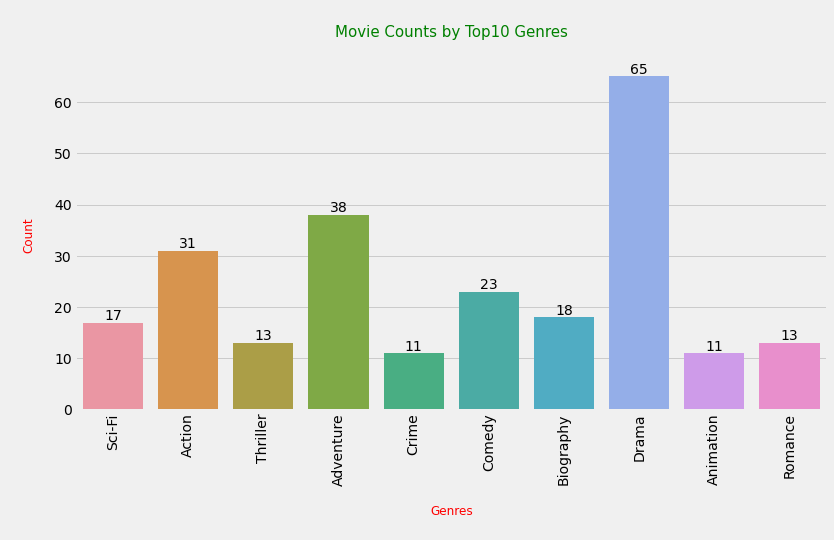

In [42]:
# Countplot for genres

# < Solution Code >

x = genre_top10.index  # assigning the x-axis values
y = genre_top10['cnt'] # assiging the y-axis values

plt.figure(figsize = [12,6]) # optimizing the plot size for better readability

ax = sns.barplot(x,y) # plotting using the seaborn bar plot

plt.title('\nMovie Counts by Top10 Genres\n', color = 'green', fontsize = 15)
plt.xlabel('\nGenres\n', color = 'red',fontsize = 12)
plt.ylabel('\nCount\n', color = 'red',fontsize = 12)

plt.xticks(rotation = 90)

for i in ax.containers:
    ax.bar_label(i,)     # code snippet for diplaying the y-values in plot using the ax attribute of the sns.barplot()

plt.show()

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

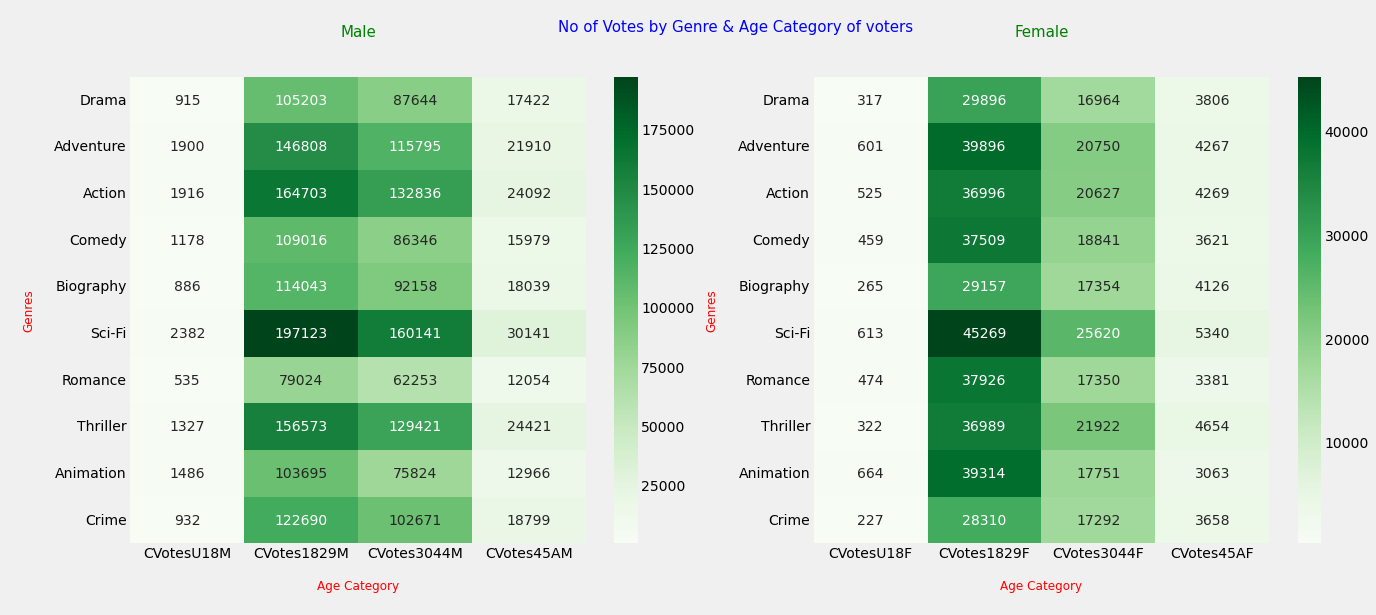

In [31]:
# 1st set of heat maps for CVotes-related columns

# < Solution Code >

fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # Initiating the sub plot , captures the fig & axes objects as return
fig.suptitle('No of Votes by Genre & Age Category of voters\n', color = 'Blue', fontsize = 15) # providing the main Title 

# Creating the first plot in the subplot ( for males )

cols_m = ['CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM'] # Selecting the columns associted Cvotes of male in different Age Categories
data_m = genre_top10[cols_m] # creating the dataframe for heatmap from the selected columns of male voters

sns.heatmap(ax=axes[0],data = data_m, cmap = 'Greens', annot = True, fmt="d") # plotting the heatmap usoing seaborn - with annotation in the proper format

axes[0].set_title('\nMale\n\n', color = 'Green', fontsize = 15)
axes[0].set_xlabel('\nAge Category\n', color = 'red',fontsize = 12)
axes[0].set_ylabel('\nGenres\n', color = 'red',fontsize = 12)

# Creating the second plot in the subplot ( for females )

cols_f = ['CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF'] # Selecting the columns associted Cvotes of female in different Age Categories
data_f = genre_top10[cols_f] # creating the dataframe for heatmap from the selected columns

sns.heatmap(ax=axes[1],data = data_f, cmap = 'Greens', annot = True, fmt="d") # plotting the heatmap usoing seaborn - with annotation in the proper format

axes[1].set_title('\nFemale\n\n', color = 'Green', fontsize = 15)
axes[1].set_xlabel('\nAge Category\n', color = 'red',fontsize = 12)
axes[1].set_ylabel('\nGenres\n', color = 'red',fontsize = 12)

plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:

- Inference 1: The audience under age 18 (irrespective of their gender), are least interested to vote, among the other age groups.
- Inference 2: After the 'Sci-Fi' movies, the male audiences tend to vote for the 'Action' genre by all the age groups, whereas the female audiences choose to vote for 'Adventure' Genre after 'Sci-Fi' movies.
- Inference 3: Male audiences do not show much interest to vote for the 'Romance'-movies irrespective of their age groups, whereas the female audiences do the same for 'Crime'-movies and 'Drama'-movies.

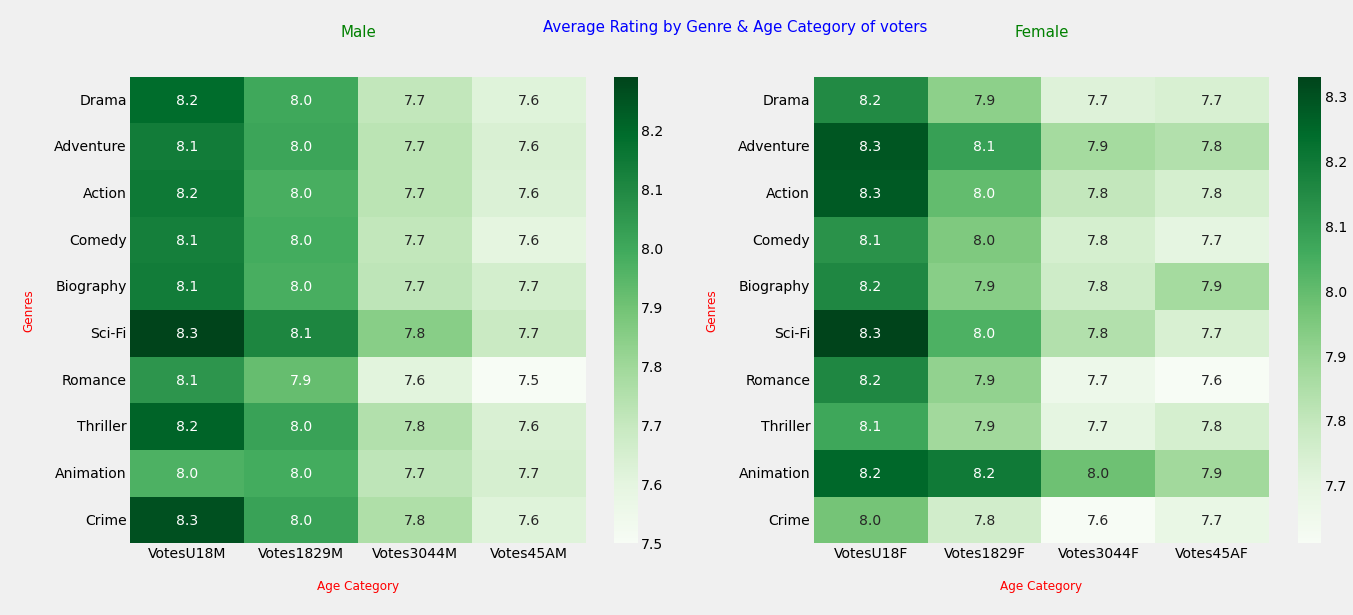

In [32]:
# 2nd set of heat maps for Votes-related columns

# < Solution Code >

fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # Initiating the sub plot
fig.suptitle('Average Rating by Genre & Age Category of voters\n', color = 'Blue', fontsize = 15) # providing the main Title 

# Creating the first plot in the subplot ( for males )

cols_m = ['VotesU18M','Votes1829M','Votes3044M','Votes45AM'] # Selecting the columns associted votes of male in different Age Categories
data_m = genre_top10[cols_m] # creating the dataframe for heatmap from the selected columns

sns.heatmap(ax=axes[0],data = data_m, cmap = 'Greens', annot = True, fmt=".1f") # plotting the heatmap usoing seaborn - with annotation in the proper format

axes[0].set_title('\nMale\n\n', color = 'Green', fontsize = 15)
axes[0].set_xlabel('\nAge Category\n', color = 'red',fontsize = 12)
axes[0].set_ylabel('\nGenres\n', color = 'red',fontsize = 12)

# Creating the second plot in the subplot ( for females )

cols_f = ['VotesU18F','Votes1829F','Votes3044F','Votes45AF'] # Selecting the columns associted votes of female in different Age Categories
data_f = genre_top10[cols_f] # creating the dataframe for heatmap from the selected columns

sns.heatmap(ax=axes[1],data = data_f, cmap = 'Greens', annot = True, fmt=".1f") # plotting the heatmap usoing seaborn - with annotation in the proper format

axes[1].set_title('\nFemale\n\n', color = 'Green', fontsize = 15)
axes[1].set_xlabel('\nAge Category\n', color = 'red',fontsize = 12)
axes[1].set_ylabel('\nGenres\n', color = 'red',fontsize = 12)

plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: The Audience under age 18 tends to give a high average rating, more than 8 out of 10 for movies of all genres. This trend is common for both male and female audiences.
- Inference 2: The Audiences above age 45 tend to give a relatively-low average rating for movies of all genres. This trend is common for both male and female audiences.
- Inference 3: Male audiences prefer 'Crime' and 'Thriller' movies after 'Sci-Fi' movies in general, while the female audiences prefer 'Adventure' and 'Animation' movies after 'Sci-Fi' movies in general

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [33]:
# Creating IFUS column

# < Solution Code >

movies['IFUS'] = movies['Country'].apply(lambda x : 'USA' if x == 'USA' else 'non-USA')

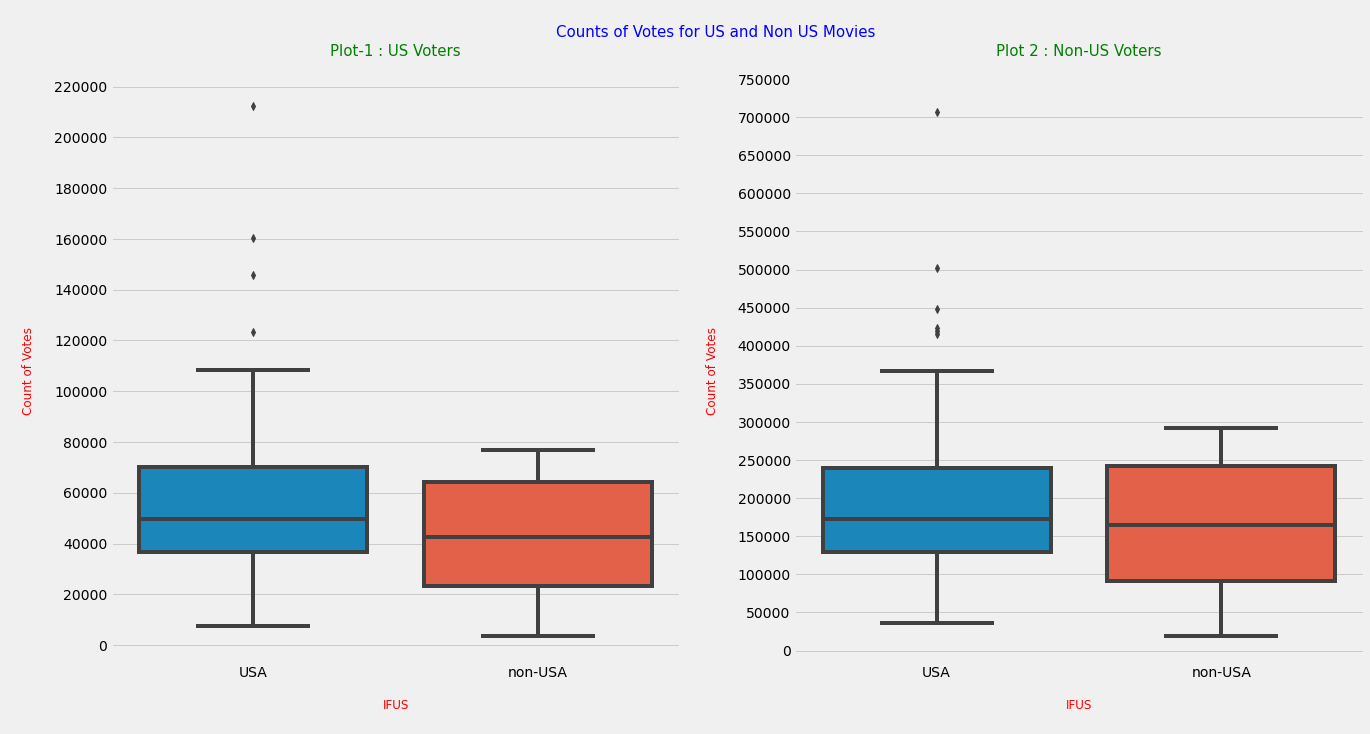

In [34]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

# < Solution Code >

fig, axes = plt.subplots(1, 2, figsize=(20, 10)) # Initiating the sub plot
fig.suptitle('\nCounts of Votes for US and Non US Movies\n', color = 'Blue', fontsize = 15) # providing the main Title 

# Coding the first subplot for US Voters

x = movies['IFUS'] # Assigning the x - values
y_us = movies['CVotesUS'] # Assinging the y values

sns.boxplot(x,y_us, ax = axes[0]) # Plotting the box plot using the seaborn boxplot in first subplot

axes[0].set_title('\n\nPlot-1 : US Voters\n', color = 'green', fontsize = 15)
axes[0].set_xlabel('\nIFUS\n', color = 'red',fontsize = 12)
axes[0].set_ylabel('\nCount of Votes\n', color = 'red',fontsize = 12)

yt_step = 20000 # defining the yticks step-size
yt = np.arange(0,max(y_us)+yt_step,yt_step) # creating the yticks values using numpy arrey 
axes[0].set_yticks(yt) # applying the modified yticks values to the plot

# Coding the second subplot for Non-US Voters

x = movies['IFUS'] # Assigning the x - values
y_non_us = movies['CVotesnUS'] # Assinging the y values

sns.boxplot(x,y_non_us, ax = axes[1]) # Plotting the box plot using the seaborn boxplot

axes[1].set_title('\n\nPlot 2 : Non-US Voters\n', color = 'green', fontsize = 15)
axes[1].set_xlabel('\nIFUS\n', color = 'red',fontsize = 12)
axes[1].set_ylabel('\nCount of Votes\n', color = 'red',fontsize = 12)

yt_step = 50000 # defining the yticks step-size
yt = np.arange(0,max(y_non_us)+yt_step,yt_step) # creating the yticks values using numpy arrey 
axes[1].set_yticks(yt) # applying the modified yticks values to the plot

plt.show()


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: US audiences are posting 11,000 or fewer votes for the US movies in general, in that 50% of the movies are getting only 5000 or fewer votes from US people. There are some outliers that can be ignored.
- Inference 2: US audiences are posting a maximum of 8000 votes for non-US movies in general, in that 50% of the non-US movies are getting just above 4000 and fewer votes.
- Inference 3 : 50th Percentile of the both us and non-us movies are votes similary by the non-us voters , rannging bewteen at 15 -17K's
- Infeence 4 : In general, US movies are also votes in high numbers the non-us voters as the top voting counts touches 37 K , where as the same thinh for non-us movies touches at 30 K's only

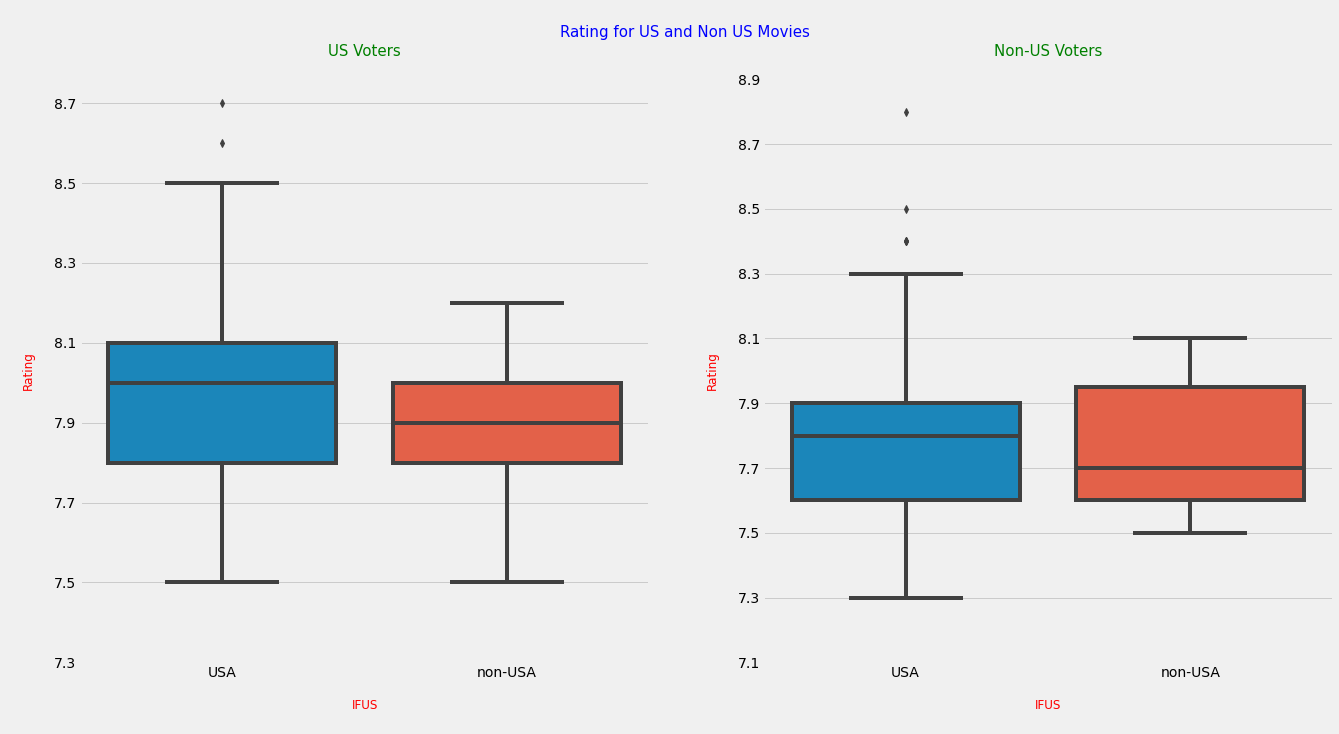

In [35]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

# < Solution Code >

fig, axes = plt.subplots(1,2, figsize=(20, 10)) # Initiating the sub plot
fig.suptitle('\nRating for US and Non US Movies\n', color = 'Blue', fontsize = 15) # providing the main Title 

# Coding the first subplot for US Voters

x = movies['IFUS'] # Assigning the x - values
y_us = movies['VotesUS'] # Assinging the y values

sns.boxplot(x,y_us, ax = axes[0]) # Plotting the box plot using the seaborn boxplot

axes[0].set_title('\nUS Voters\n', color = 'green', fontsize = 15)
axes[0].set_xlabel('\nIFUS\n', color = 'red',fontsize = 12)
axes[0].set_ylabel('\nRating\n', color = 'red',fontsize = 12)

yt_step = 0.2 # defining the yticks step-size
yt = np.arange(min(y_us)-yt_step,max(y_us)+yt_step,yt_step) # creating the yticks values using numpy arrey 

axes[0].set_yticks(yt) # applying the modified yticks values to the plot

# Coding the second subplot for Non-US Voters

x = movies['IFUS'] # Assigning the x - values
y_non_us = movies['VotesnUS'] # Assinging the y values

sns.boxplot(x,y_non_us, ax = axes[1]) # Plotting the box plot using the seaborn boxplot

axes[1].set_title('\nNon-US Voters\n', color = 'green', fontsize = 15)
axes[1].set_xlabel('\nIFUS\n', color = 'red',fontsize = 12)
axes[1].set_ylabel('\nRating\n', color = 'red',fontsize = 12)

yt_step = 0.2 # defining the yticks step-size
yt = np.arange(min(y_non_us)-yt_step,max(y_non_us)+yt_step,yt_step) # creating the yticks values using numpy arrey 

axes[1].set_yticks(yt) # applying the modified yticks values to the plot

plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: US people are rating the US movies relatively better than non-US movies in general. 50% of the US movies are getting a rating of 8 or fewer whereas 50% of non-US movies are getting a rating of 7.9 or fewer.
- Inference 2: It's clear that 25% of both US-movies and non-US-movies are rated similarly by the US-people and they are getting only 7.8 or fewer rating
- Inference : The US voters are giving the maximum rating 8.5 for US movies whereas the non-use voters are giving to the maximum of 8.3 for the US movies
- Infernce 4 : US voters in general is voting high to the non us movies to that of non us voters do it for the non us movies (there is a gap 0.1 between the upper-fences of the respective box plots)

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [36]:
# Sorting by CVotes1000

genre_top10.sort_values(by = 'CVotes1000', ascending = False, inplace = True)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13


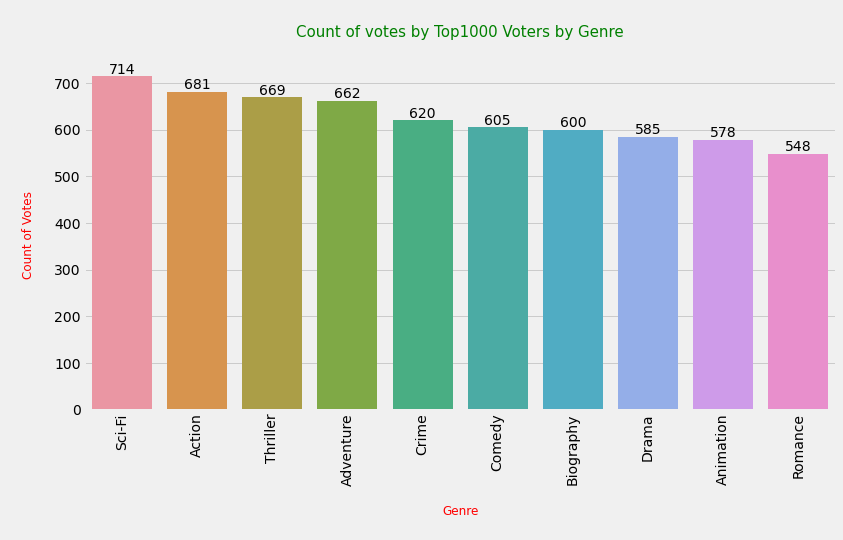

In [41]:
# Bar plot

# < Solution Code >

x = genre_top10.index
y = genre_top10['CVotes1000']

plt.figure(figsize = [12,6])
ax = sns.barplot(x,y)
plt.title('\nCount of votes by Top1000 Voters by Genre\n', color = 'green', fontsize = 15)
plt.xlabel('\nGenre\n', color = 'red',fontsize = 12)
plt.ylabel('\nCount of Votes\n', color = 'red',fontsize = 12)
plt.xticks(rotation = 90)

for i in ax.containers:
    ax.bar_label(i,) 

plt.show()

**`Inferences:`** Write your inferences/observations here.

Inference 1 : 'Sci-Fi' movies are the most voted genre by the Top1000 voters with 714 votes. whereas 'Romance' is the least-considered genre by the top1000 voters with only 548 votes

Inference 2 : 'Action', 'Adventure' and 'Thriller' movies are also considered by Top1000 voters after 'Sci-Fi' movies. These genres also grabbed a decent number of votes from the Top1000 voters, ranging from 681 to 662.

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.